## Spark Session ve Veriseti

In [1]:
from warnings import filterwarnings
filterwarnings(action='ignore')
import findspark
findspark.init('/Users/ibrahim/spark/spark-3.5.1-bin-hadoop3')

In [2]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [3]:
spark = (SparkSession.builder  
            .master("local") 
            .appName("Using ML Algorithms on Spark") 
            .getOrCreate()
)
sc = spark.sparkContext
sc
# configin normalde boş bırakılması sisteme uygun bir şekilde configlenir. istersek ram ayarları gibi ayarları yapabiliriz.

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/22 22:23:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<SparkContext master=local appName=Using ML Algorithms on Spark>

In [4]:
spark_df = spark.read.csv("./churn.csv", header=True, inferSchema=True, sep=",")
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [5]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [6]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



24/05/22 22:23:26 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Churn
 Schema: _c0, Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Churn
Expected: _c0 but found: 
CSV file: file:///Users/ibrahim/Desktop/workspace/Data%20Science%20Stats/Using-Machine-Learning-Algorithms-on-Big-Data/churn.csv


In [7]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [8]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



## Bir sıkıntı çıkarmaması için sütun isimleri küçültüldü

In [9]:
spark_df = spark_df.withColumnRenamed("_c0","index")

In [10]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [11]:
spark_df.count()

900

In [12]:
len(spark_df.columns)

8

In [13]:
spark_df.distinct().count()

900

In [14]:
spark_df.select("names").distinct().count()

899

In [15]:
spark_df.groupBy("names").count().sort("count",ascending = False).show()

+------------------+-----+
|             names|count|
+------------------+-----+
|     Jennifer Wood|    2|
|      Patrick Bell|    1|
|  Patrick Robinson|    1|
|     Chelsea Marsh|    1|
|       John Barber|    1|
|       Amber Evans|    1|
|     David Compton|    1|
| Mr. Jerome Dawson|    1|
|        Lisa Davis|    1|
|     Maria Stanley|    1|
|Alexandra Phillips|    1|
|     Nicholas Levy|    1|
|    Richard Farmer|    1|
|     Linda Hubbard|    1|
|    Jesse Mitchell|    1|
|    Brittany Green|    1|
|  Timothy Johnston|    1|
|   Charles Whitney|    1|
|    Tony Schneider|    1|
|  Stefanie Miranda|    1|
+------------------+-----+
only showing top 20 rows



## Aynı isimde olan Jennifer Wood ismi bir çoklama mı yoksa ayrı ayrı insanlar mı sorusunun cevabını alalım

In [16]:
spark_df.filter(spark_df.names == "Jennifer Wood").show(2)

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



## Çıktıdan da görüldüğü üzere ayrı ayrı aynı isime sahip insanlarmış.

In [17]:
spark_df.select("names").dropDuplicates().groupby("names").count().sort("count", ascending = False).show(5)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
|     John Barber|    1|
|     Amber Evans|    1|
+----------------+-----+
only showing top 5 rows



## Yukarıda names sütunu bazında tekrar eden verileri sildik bunları grupladık ve isimlerin ne kadar tekrar ettiğini count ile yanına yazdırdık bunun yanında count'a göre sıraladık.

In [18]:
spark_df.where(spark_df.index == 439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [19]:
spark_df.where(spark_df.index == 439).show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



## Sorgunun çıktısını bir girdi olarak kullanabilmek adına collect() fonksiyonunu kullanabiliriz

In [20]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"]

In [21]:
jen

'Jennifer Wood'

In [22]:
type(jen)

str

## Keşifçi Veri Analizi

In [23]:
spark_df.describe().show()

24/05/22 22:23:28 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [24]:
spark_df.select("age","total_purchase", "account_manager", "years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [25]:
spark_df.filter(spark_df.age > 47).count()

161

In [26]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



## Makine öğrenim modeli tek bir fonksiyondan ibarettir esas üzerinde durmamız gereken konu çaprazlamalardır.

## Aşağıdaki çaprazlama incelendiğinde churn olup olmama durumunun satın alma ile çaprazlaması sonucu şu sonuca ulaşıyoruz demek ki churn olup olmama satın alma ile alakalı değil çünkü ortalamaları birbirine çok yakın

In [27]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [28]:
spark_df.groupby("churn").agg({"years": "mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



## Şimdi daha iyi anlamak üzere korelasyon matrisi oluşturalım

In [29]:
kor_data = spark_df.drop("index","names").toPandas() #öncelikle index ve names'i atacağız çünkü korelasyonda bunlarla ilgili bir işimiz yok

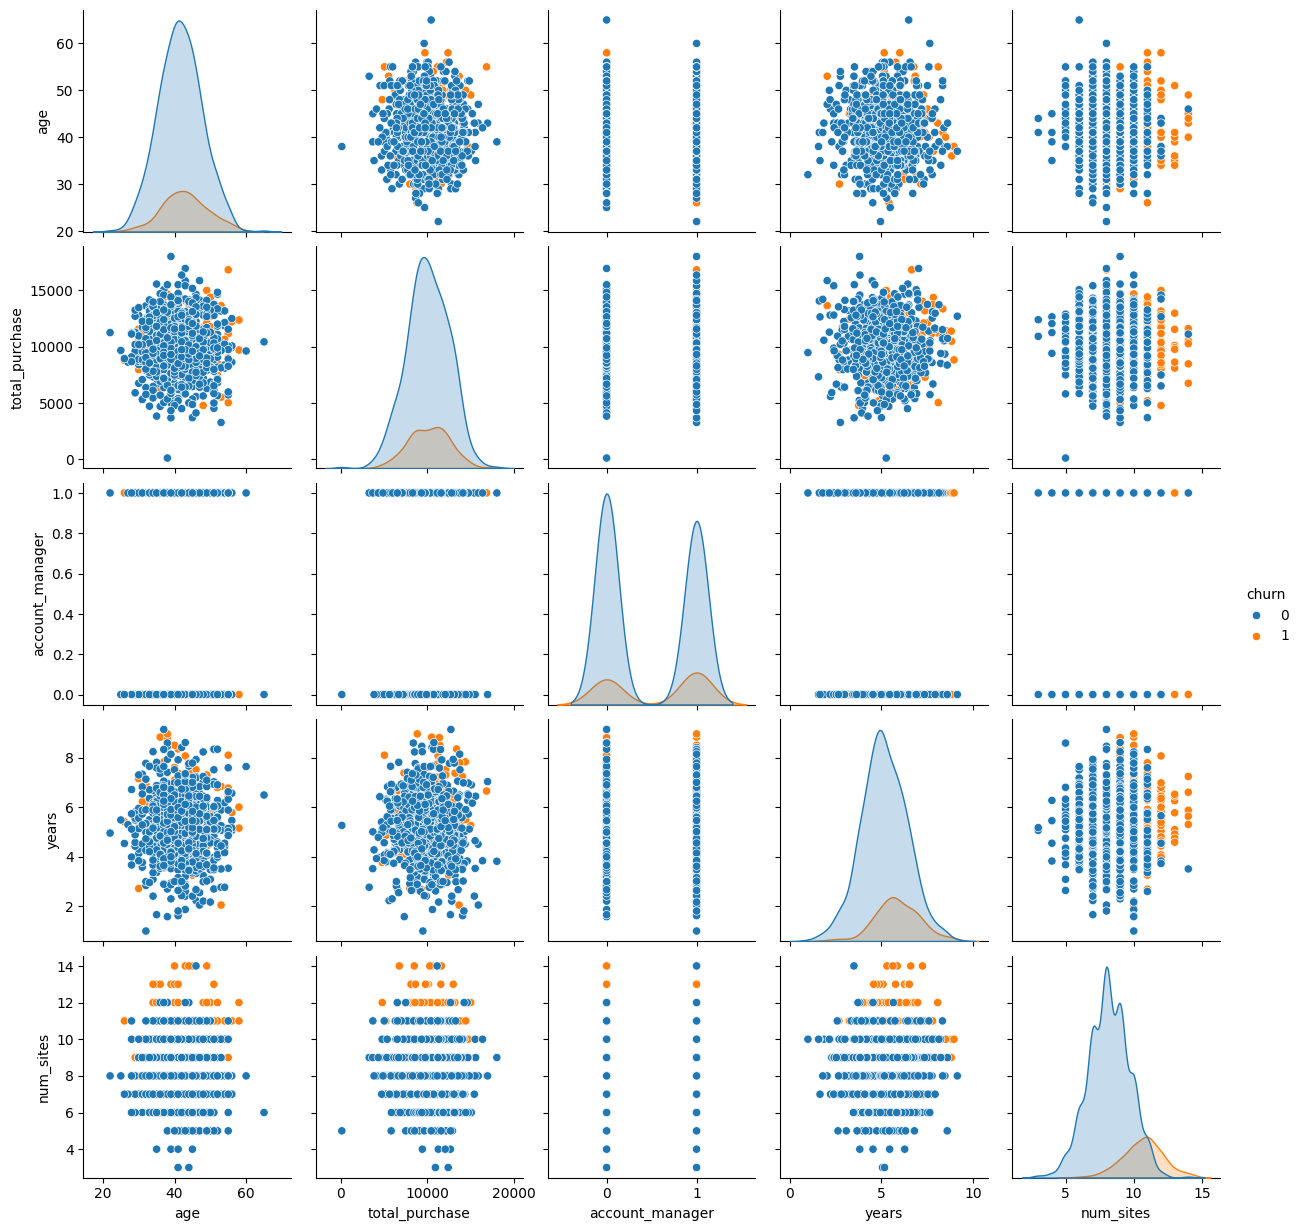

In [30]:
import seaborn as sns
sns.pairplot(kor_data, hue = "churn");

## Yukarıda korelasyonları inceledik fakat sadece bize anlamlı gelen grafikleri görmek istersek vars argümanını kullanabiliriz.

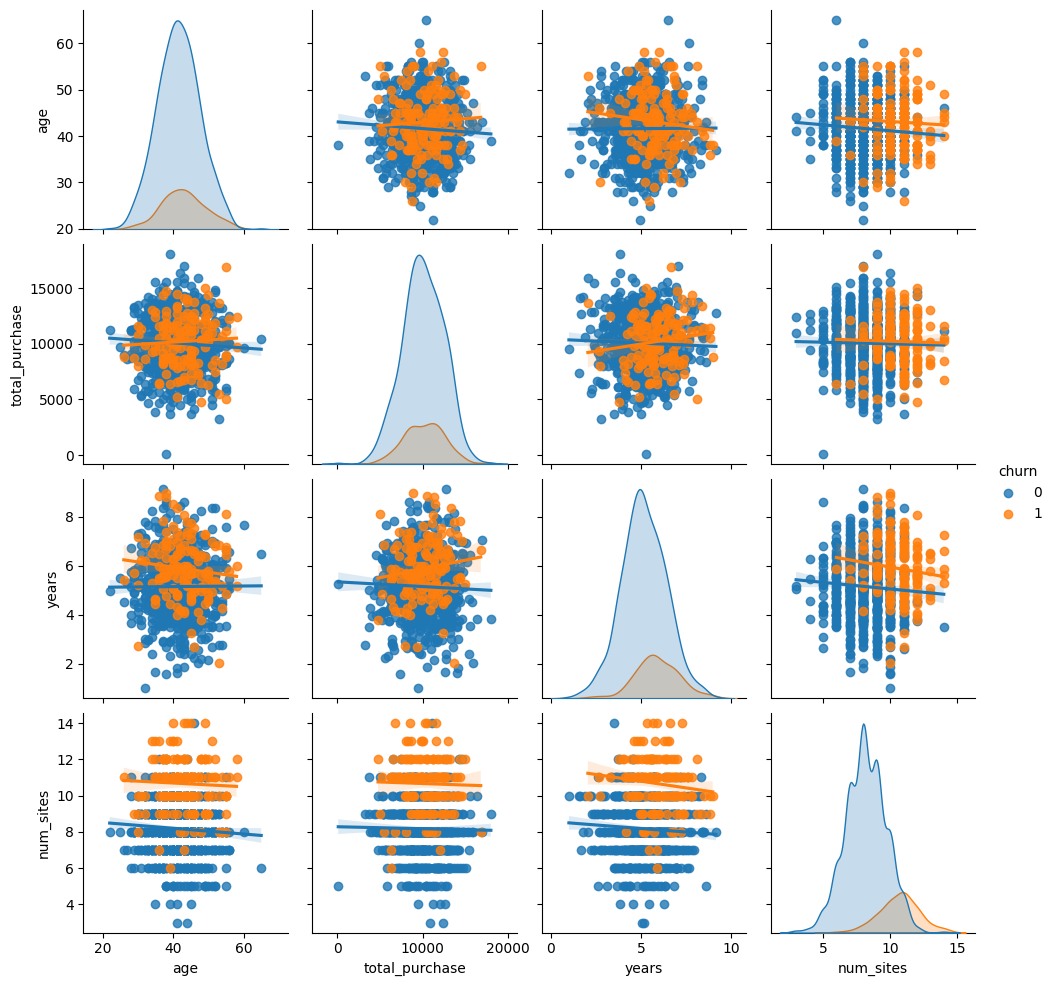

In [31]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"], 
             hue = "churn",
            kind = "reg");

## Veri Ön İşleme

## Eksik gözlemlerden aşağıdaki betik ile kurtulduk

In [32]:
spark_df = spark_df.dropna()

## Future engineering olarak adlandırılan süreçte yapılan bir örnek yaparak yeni bir sütun ekledik ve age değişkeninin karesini aldık

In [33]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2)

In [34]:
spark_df.show()

+-----+-------------------+----+--------------+---------------+-----+---------+-----+--------+
|index|              names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+-------------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
|    3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|
|    4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|
|    5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|  2304.0|
|    6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|  1936.0|
|    7|      Zachary Walsh|32.0|       9885.12|   

# Büyük Veride Bağımlı ve Bağımsız Değişkenin Ayrılması

In [35]:
from pyspark.ml.feature import StringIndexer

## StringIndexer bize verilerimizi dönüştürmemiz için yardım sağlar.

In [36]:
stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label")

## Yukarıda kategorik değişken olaran churn bağımlı değişkenini label olarak indexledik.

In [37]:
?StringIndexer

Init signature:
StringIndexer(
    *,
    inputCol: Optional[str] = None,
    outputCol: Optional[str] = None,
    inputCols: Optional[List[str]] = None,
    outputCols: Optional[List[str]] = None,
    handleInvalid: str = 'error',
    stringOrderType: str = 'frequencyDesc',
)
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
St

# Default olarak StringIndexer en çok tekrar edenleri 0 ile işaretler diğerlerini 1 ile işaretler!!!

In [38]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [39]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

## Tip incelemesi sonucu label'ın double olduğunu görüyoruz ve aşağıdaki fonksiyon ile integer'a çevirmiş bulunuyoruz.

In [40]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [41]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

## Şu anda bağımlı değişken ayarlandı.

## Şimdi Bağımsız Değişkenleri Ayarlayalım

In [42]:
from pyspark.ml.feature import VectorAssembler

In [43]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [44]:
bagimsiz_degiskenler = ["age","total_purchase", "account_manager","years","num_sites"]

In [45]:
vectorAssembler = VectorAssembler(inputCols = bagimsiz_degiskenler, outputCol = "features")

## Yukarıda bağımsız değişkenlerimizin vektör ayarlamasını yapacak olan değişkenimizi oluşturduk

In [46]:
va_df = vectorAssembler.transform(spark_df)

In [47]:
final_df = va_df.select(["features","label"])

In [48]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



## Test-Train Aşamaları

In [49]:
splits = final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [50]:
train_df.head(5)

[Row(features=DenseVector([25.0, 9672.03, 0.0, 5.49, 8.0]), label=0),
 Row(features=DenseVector([26.0, 8787.39, 1.0, 5.42, 11.0]), label=1),
 Row(features=DenseVector([26.0, 8939.61, 0.0, 4.54, 7.0]), label=0),
 Row(features=DenseVector([27.0, 8628.8, 1.0, 5.3, 7.0]), label=0),
 Row(features=DenseVector([28.0, 11128.95, 1.0, 5.12, 8.0]), label=0)]

In [51]:
test_df.head(5)

[Row(features=DenseVector([22.0, 11254.38, 1.0, 4.96, 8.0]), label=0),
 Row(features=DenseVector([28.0, 8670.98, 0.0, 3.99, 6.0]), label=0),
 Row(features=DenseVector([28.0, 9090.43, 1.0, 5.74, 10.0]), label=0),
 Row(features=DenseVector([30.0, 8403.78, 1.0, 4.13, 7.0]), label=0),
 Row(features=DenseVector([30.0, 8874.83, 0.0, 5.56, 9.0]), label=0)]

# GBM ile Müşteri Terk Modellemesi

In [52]:
from pyspark.ml.classification import GBTClassifier

In [53]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")

In [54]:
gbm_model = gbm.fit(train_df)


In [55]:
y_pred = gbm_model.transform(test_df)

In [56]:
y_pred


DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [57]:
ac = y_pred.select("label","prediction")

## Valide Edilmemiş Yani Cross-Validation İşlemi Görmemiş Accuracy Değerinin Ölçümü

In [58]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

24/05/22 22:23:37 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/22 22:23:37 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/05/22 22:23:37 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


0.8745519713261649

## Model Tuning Operasyonları

In [59]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 10)

In [60]:
cv_model = cv.fit(train_df)

In [61]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label","prediction")

## Doğruluk Oranı Hesabı Aşağıdaki Gibi Yapılır

In [62]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8781362007168458

## AUC yani Eğri Altında Kalan Alanın Hesabı Aşağıdaki Gibi Hesaplanır.

In [63]:
evaluator.evaluate(y_pred)

0.9180851063829788

## Bu müşteriler bizi terk eder mi?

In [65]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [66]:
yeni_musteriler

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Ata Bakmayan Ali,40,100000,1,30,50


## Spark tarafına pandas data frame'i çevirmek zorundayız ve aşağıdaki gibi yaptık

In [67]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [68]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [69]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



## Modele verileri vermek için bağımsız değişkenlerimizi vektör formunda yapmamız gerekiyor ve aşağıdaki gibi yapabiliriz.

In [70]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf)

## Transform fonksiyonunu geçmişte kullandığımız predict fonksiyonu olarak düşünebiliriz.

In [71]:
sonuclar = cv_model.transform(yeni_musteriler)

In [72]:
sonuclar.select("names","prediction").show()

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+

